In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [34]:
df_ethereum = pd.read_csv('C:/Users/cecig/OneDrive/Documentos/GitHub/ponderada-cripto/src/dados/ethereum_365days.csv')

## GRU

In [35]:
# Normalizar os dados
scaler = MinMaxScaler()
df_ethereum[['close']] = scaler.fit_transform(df_ethereum[['close']])

# Criar sequências temporais
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(df_ethereum['close'].values, window_size)

# Separar em treino e teste
X_train, X_test = X[:int(0.8 * len(X))], X[int(0.8 * len(X)):]
y_train, y_test = y[:int(0.8 * len(y))], y[int(0.8 * len(y)):]

# Criar e treinar o modelo GRU
model_gru = Sequential()
model_gru.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(GRU(50))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

# Fazer previsões
y_pred = model_gru.predict(X_test)

Epoch 1/10


c:\Users\cecig\OneDrive\Documentos\GitHub\ponderada-cripto\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1903
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0247
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0085
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0115
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0051
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0051
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0040
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0037
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0039
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


## Arima

In [36]:
# Ajustar o modelo ARIMA
model_arima = ARIMA(df_ethereum['close'], order=(5, 1, 2))  # Exemplo de parâmetros
model_arima_fit = model_arima.fit()

# Prever os próximos 30 dias
forecast_arima = model_arima_fit.forecast(steps=30)

## Holt-Winters

In [37]:
# Ajustar o modelo Holt-Winters
model_hw = ExponentialSmoothing(df_ethereum['close'], trend='add', seasonal='add', seasonal_periods=7)
model_hw_fit = model_hw.fit()

# Prever os próximos 30 dias
forecast_hw = model_hw_fit.forecast(steps=30)

## Previsões Modelos ARIMA e Holt-Winter

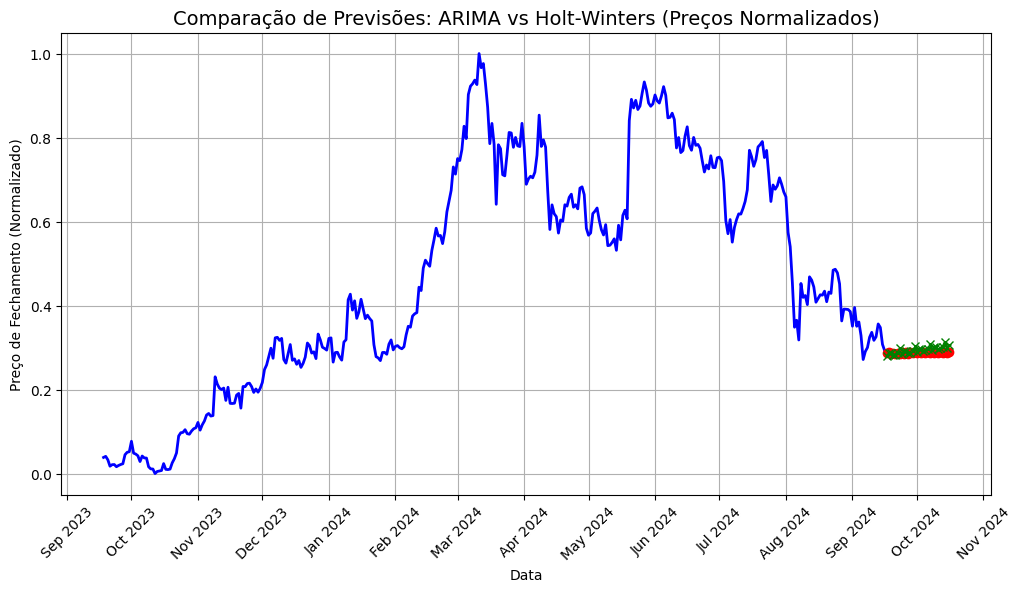

In [38]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotar os dados observados
df_ethereum['timestamp'] = pd.to_datetime(df_ethereum['timestamp'])

plt.plot(df_ethereum['timestamp'], df_ethereum['close'], label='Observado', color='blue', linewidth=2)

# Gerar a faixa de datas a partir do último 'timestamp'
last_date = df_ethereum['timestamp'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(forecast_arima) + 1)

# Plotar as previsões ARIMA e Holt-Winters com estilos diferentes
plt.plot(future_dates[1:], forecast_arima, label='Previsão ARIMA', color='red', linestyle='--', marker='o')
plt.plot(future_dates[1:], forecast_hw, label='Previsão Holt-Winters', color='green', linestyle='-.', marker='x')

# Melhorar a legibilidade do eixo x com datas formatadas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

# Adicionar título e rótulos aos eixos
plt.title('Comparação de Previsões: ARIMA vs Holt-Winters (Preços Normalizados)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (Normalizado)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


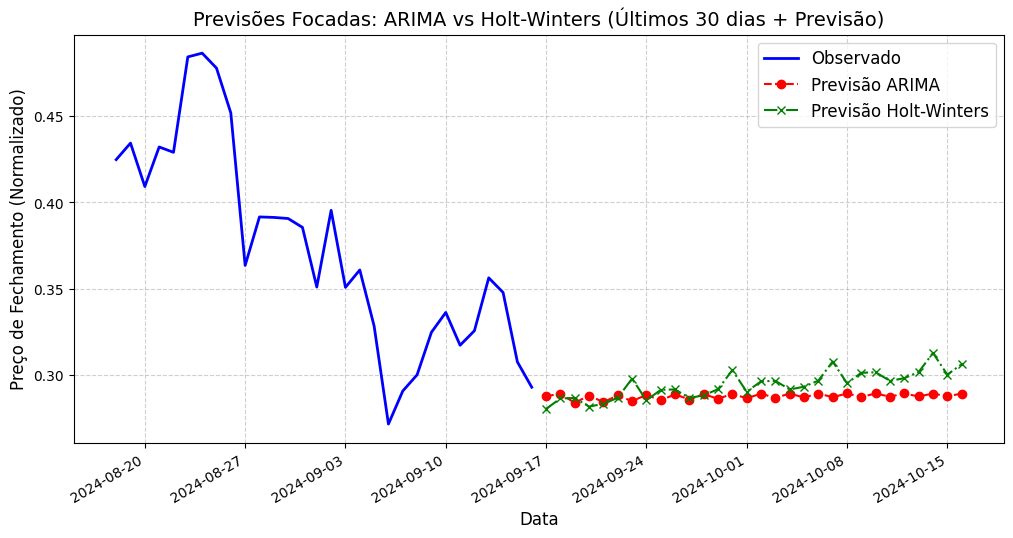

In [39]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Exibir apenas os últimos 30 dias de dados observados
num_last_days = 30
df_ethereum_last_days = df_ethereum.tail(num_last_days)

# Plotar os últimos dias de dados observados
plt.plot(df_ethereum_last_days['timestamp'], df_ethereum_last_days['close'], label='Observado', color='blue', linewidth=2)

# Gerar a faixa de datas a partir do último 'timestamp' do conjunto de dados observado
last_date = df_ethereum_last_days['timestamp'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=len(forecast_arima) + 1)

# Plotar as previsões ARIMA e Holt-Winters com estilos diferentes
plt.plot(future_dates[1:], forecast_arima, label='Previsão ARIMA', color='red', linestyle='--', marker='o')
plt.plot(future_dates[1:], forecast_hw, label='Previsão Holt-Winters', color='green', linestyle='-.', marker='x')

# Melhorar a legibilidade do eixo x com datas formatadas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Ajustar para mostrar uma data por semana
plt.gcf().autofmt_xdate()  # Rotacionar as datas no eixo x

# Adicionar título e rótulos aos eixos
plt.title('Previsões Focadas: ARIMA vs Holt-Winters (Últimos 30 dias + Previsão)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (Normalizado)', fontsize=12)

# Adicionar gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adicionar legenda
plt.legend(loc='best', fontsize=12)

# Exibir o gráfico
plt.show()


Verificação de valores nulos em 'timestamp': 0


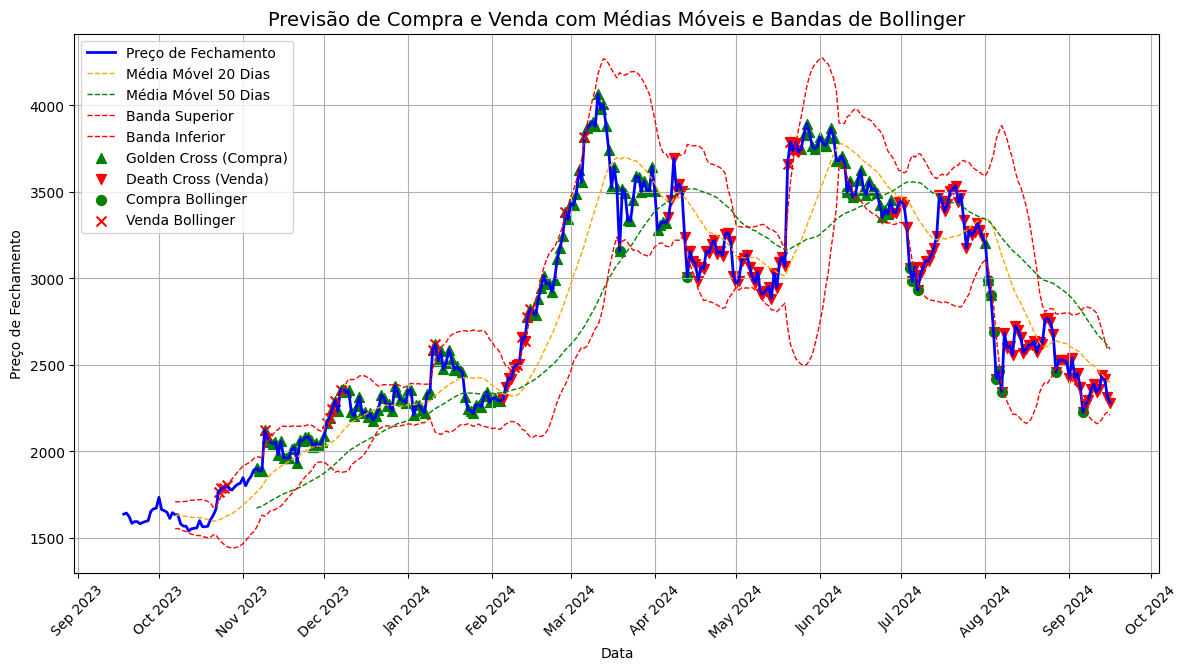

In [44]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Garantir que 'timestamp' esteja em formato de datetime
df_ethereum['timestamp'] = pd.to_datetime(df_ethereum['timestamp'], errors='coerce')

# Verificar se há valores nulos ou incorretos em 'timestamp'
print("Verificação de valores nulos em 'timestamp':", df_ethereum['timestamp'].isnull().sum())

# Definir um período de visualização mais recente (opcional)
df_ethereum_recent = df_ethereum[df_ethereum['timestamp'] > '2023-01-01']  # Focar no último ano, por exemplo

# Função para ajustar a visualização
def previsao_com_medias_moveis_bollinger(df):
    # Calcular Médias Móveis e Bandas de Bollinger
    df = calcular_medias_moveis(df)
    df = calcular_bandas_bollinger(df)
    
    # Gerar Sinais
    df = gerar_sinais(df)
    df = sinais_bollinger(df)

    # Configurar o gráfico
    plt.figure(figsize=(14, 7))
    
    # Preço de Fechamento
    plt.plot(df['timestamp'], df['close'], label='Preço de Fechamento', color='blue', linewidth=2)

    # Médias Móveis
    plt.plot(df['timestamp'], df['SMA_20'], label='Média Móvel 20 Dias', color='orange', linestyle='--', linewidth=1)
    plt.plot(df['timestamp'], df['SMA_50'], label='Média Móvel 50 Dias', color='green', linestyle='--', linewidth=1)
    
    # Bandas de Bollinger
    plt.plot(df['timestamp'], df['Upper_Band'], label='Banda Superior', color='red', linestyle='--', linewidth=1)
    plt.plot(df['timestamp'], df['Lower_Band'], label='Banda Inferior', color='red', linestyle='--', linewidth=1)

    # Adicionar Sinais de Compra e Venda (Cruzamento de Médias Móveis)
    plt.scatter(df[df['Golden_Cross'] == 1]['timestamp'], df[df['Golden_Cross'] == 1]['close'], marker='^', color='green', label='Golden Cross (Compra)', s=50)
    plt.scatter(df[df['Death_Cross'] == 1]['timestamp'], df[df['Death_Cross'] == 1]['close'], marker='v', color='red', label='Death Cross (Venda)', s=50)

    # Adicionar Sinais de Bandas de Bollinger
    plt.scatter(df[df['Compra_Bollinger'] == 1]['timestamp'], df[df['Compra_Bollinger'] == 1]['close'], marker='o', color='green', label='Compra Bollinger', s=50)
    plt.scatter(df[df['Venda_Bollinger'] == 1]['timestamp'], df[df['Venda_Bollinger'] == 1]['close'], marker='x', color='red', label='Venda Bollinger', s=50)
    
    # Melhorar a legibilidade do eixo de datas
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar a cada mês
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formatar como Mês/Ano
    plt.xticks(rotation=45)

    # Título e rótulos dos eixos
    plt.title('Previsão de Compra e Venda com Médias Móveis e Bandas de Bollinger', fontsize=14)
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento')

    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar a função de visualização ao período recente
previsao_com_medias_moveis_bollinger(df_ethereum_recent)
